In [2]:
import pandas as pd

In [3]:
fp = "L6/data/029740.txt"
data = pd.read_csv(
    filepath_or_buffer=fp,
    delim_whitespace=True,
    na_values=["*", "**", "***", "****", "*****", "******"],
    usecols=["YR--MODAHRMN", "TEMP", "MAX", "MIN"],
    parse_dates=["YR--MODAHRMN"],
    index_col="YR--MODAHRMN",
)

In [4]:
data.head()

,TEMP,MAX,MIN
YR--MODAHRMN,,,
1952-01-01 00:00:00,36.0,NaN,NaN
1952-01-01 06:00:00,37.0,NaN,34.0
1952-01-01 12:00:00,39.0,NaN,NaN
1952-01-01 18:00:00,36.0,39.0,NaN
1952-01-02 00:00:00,36.0,NaN,NaN


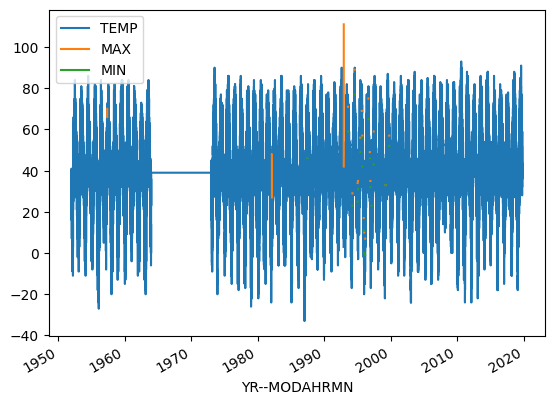

In [5]:
ax = data.plot()

In [6]:
type(ax)

matplotlib.axes._axes.Axes

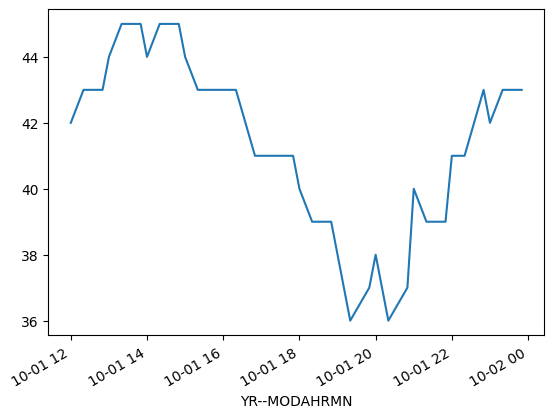

In [7]:
oct1_temps = data["TEMP"].loc[data.index >= "201910011200"]
ax = oct1_temps.plot()

In [8]:
oct1_temps.index

DatetimeIndex(['2019-10-01 12:00:00', '2019-10-01 12:20:00',
               '2019-10-01 12:50:00', '2019-10-01 13:00:00',
               '2019-10-01 13:20:00', '2019-10-01 13:50:00',
               '2019-10-01 14:00:00', '2019-10-01 14:20:00',
               '2019-10-01 14:50:00', '2019-10-01 15:00:00',
               '2019-10-01 15:20:00', '2019-10-01 15:50:00',
               '2019-10-01 16:00:00', '2019-10-01 16:20:00',
               '2019-10-01 16:50:00', '2019-10-01 17:00:00',
               '2019-10-01 17:20:00', '2019-10-01 17:50:00',
               '2019-10-01 18:00:00', '2019-10-01 18:20:00',
               '2019-10-01 18:50:00', '2019-10-01 19:00:00',
               '2019-10-01 19:20:00', '2019-10-01 19:50:00',
               '2019-10-01 20:00:00', '2019-10-01 20:20:00',
               '2019-10-01 20:50:00', '2019-10-01 21:00:00',
               '2019-10-01 21:20:00', '2019-10-01 21:50:00',
               '2019-10-01 22:00:00', '2019-10-01 22:20:00',
               '2019-10-

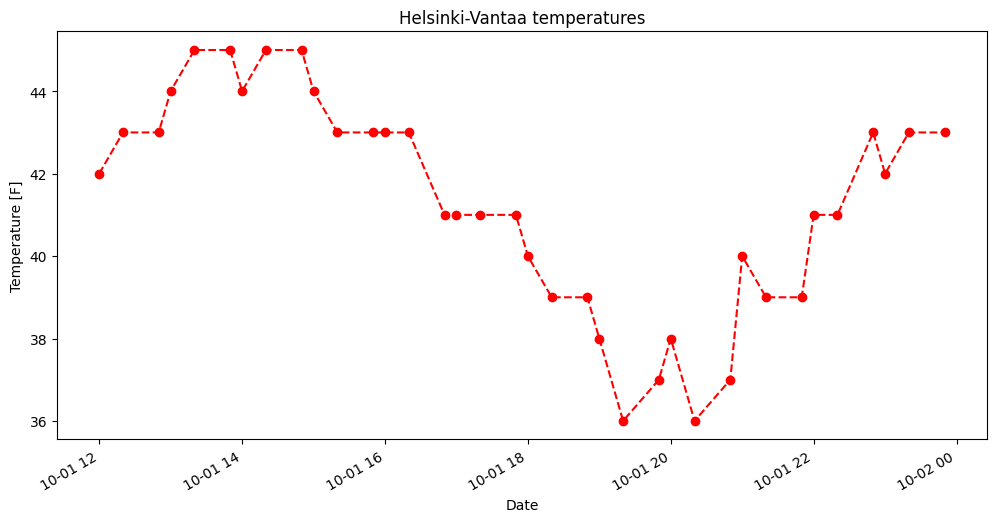

In [9]:
ax = oct1_temps.plot(
    style="ro--",
    title="Helsinki-Vantaa temperatures",
    xlabel="Date",
    ylabel="Temperature [F]",
    figsize=(12, 6),
)

In [20]:
oct1_temps_night = oct1_temps[(oct1_temps.index >= "201910011800") & (oct1_temps.index <= "201910012359")] # oct1_temp.max()
print(f"Time {oct1_temps_night.index[oct1_temps_night.argmax()]} : Temp {oct1_temps_night.max()}")

Time 2019-10-01 22:50:00 : Temp 43.0


Text(2019-10-01 22:50:00, 43.0, 'Warmest temperature in early afternoon ->')

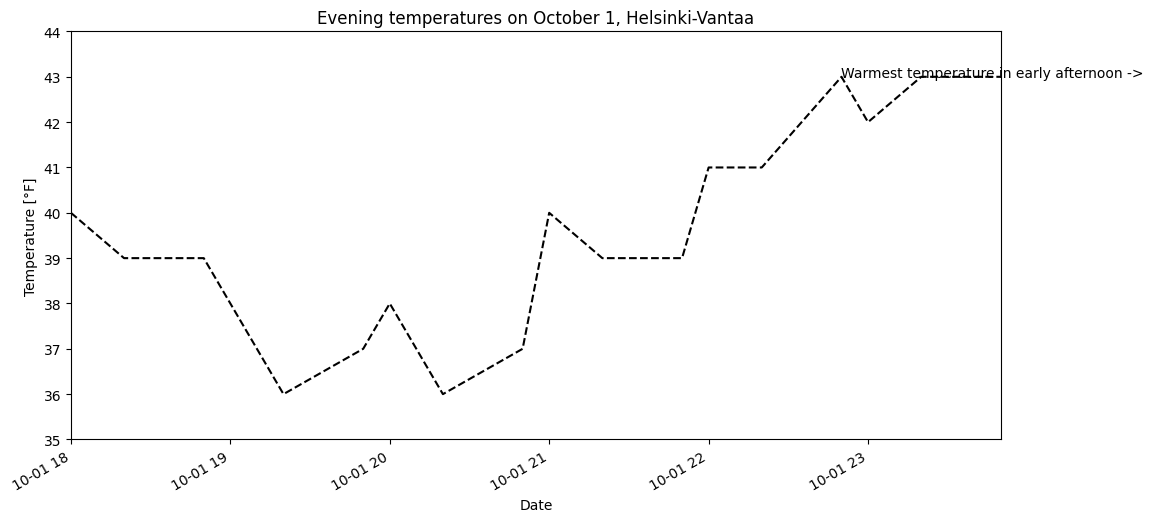

In [25]:
# Define the start, end, and cold times
start_time = pd.to_datetime("201910011800")
end_time = pd.to_datetime("201910012350")
    
oct1_temps_night = oct1_temps[(oct1_temps.index >= "201910011800") & (oct1_temps.index <= "201910012359")] # oct1_temp.max()

warm_time = oct1_temps_night.index[oct1_temps_night.argmax()]

# Create the plot, including the axis limits
ax = oct1_temps_night.plot(
    style="k--",
    title="Evening temperatures on October 1, Helsinki-Vantaa",
    xlabel="Date",
    ylabel="Temperature [°F]",
    xlim=[start_time, end_time],
    ylim=[35, 44.0],
    figsize=(12, 6),
)

# Add text to display the coldest temperature
ax.text(warm_time, oct1_temps_night.max(), "Warmest temperature in early afternoon ->")

In [27]:
import hvplot.pandas

In [28]:
july2014_df = data.loc[(data.index >= "201407010000") & (data.index < "201407310000")]

july2014_df.hvplot(
    title="Helsinki-Vantaa temperatures",
    xlabel="Date",
    ylabel="Temperature [°F]",
    ylim=[45.0, 90.0],
)

:NdOverlay   [Variable]
   :Curve   [YR--MODAHRMN]   (value)

In [1]:
import pandas as pd
fp = "L6/data/029740.txt"

In [2]:
data = pd.read_csv(
    fp,
    delim_whitespace=True,
    na_values=["*", "**", "***", "****", "*****", "******"],
    usecols=["YR--MODAHRMN", "TEMP", "MAX", "MIN"],
    parse_dates=["YR--MODAHRMN"],
    index_col="YR--MODAHRMN",
)

In [3]:
data.head()

,TEMP,MAX,MIN
YR--MODAHRMN,,,
1952-01-01 00:00:00,36.0,NaN,NaN
1952-01-01 06:00:00,37.0,NaN,34.0
1952-01-01 12:00:00,39.0,NaN,NaN
1952-01-01 18:00:00,36.0,39.0,NaN
1952-01-02 00:00:00,36.0,NaN,NaN


In [4]:
data.isna().sum() # isna return a dataframe

TEMP      3579
MAX     900880
MIN     900896
dtype: int64

In [5]:
data = data.rename(columns={
    "TEMP":"TEMP_F"
})

In [6]:
data.columns

Index(['TEMP_F', 'MAX', 'MIN'], dtype='object')

In [7]:
data.dropna(subset=["TEMP_F"], inplace=True) # just drop rows whose TEMP_F is none

In [8]:
len(data)

928188

In [9]:
len(data.dropna()) # drop all rows with any none value

20433

In [10]:
data["TEMP_C"] = (data["TEMP_F"] - 32.0) / 1.8

In [11]:
data.head()

,TEMP_F,MAX,MIN,TEMP_C
YR--MODAHRMN,,,,
1952-01-01 00:00:00,36.0,NaN,NaN,2.222222
1952-01-01 06:00:00,37.0,NaN,34.0,2.777778
1952-01-01 12:00:00,39.0,NaN,NaN,3.888889
1952-01-01 18:00:00,36.0,39.0,NaN,2.222222
1952-01-02 00:00:00,36.0,NaN,NaN,2.222222


In [12]:
winter = data.loc[(data.index >= "201212010000") & (data.index < "201303010000")]
winter_temps = winter["TEMP_C"]

spring = data.loc[(data.index >= "201303010000") & (data.index < "201306010000")]
spring_temps = spring["TEMP_C"]

summer = data.loc[(data.index >= "201306010000") & (data.index < "201309010000")]
summer_temps = summer["TEMP_C"]

autumn = data.loc[(data.index >= "201309010000") & (data.index < "201312010000")]
autumn_temps = autumn["TEMP_C"]


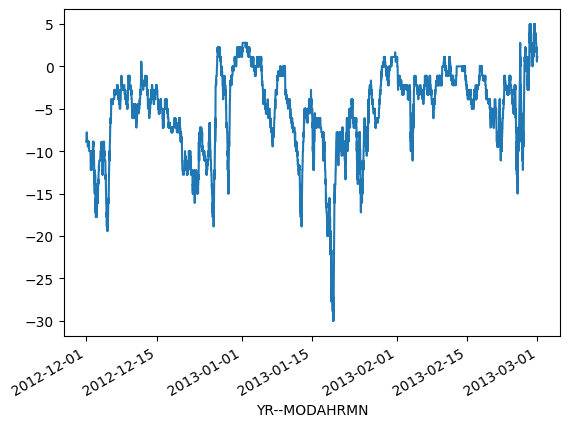

In [13]:
ax1 = winter_temps.plot()

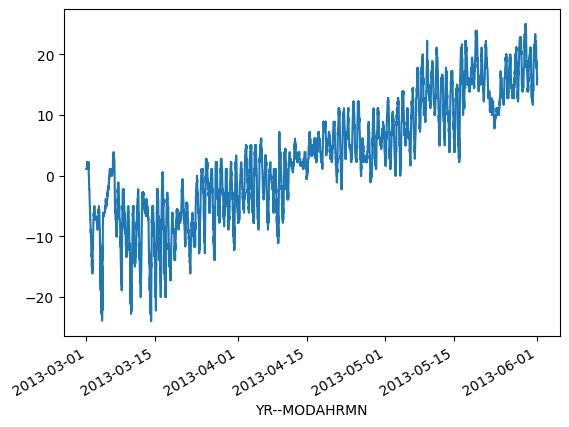

In [14]:
ax2 = spring_temps.plot()

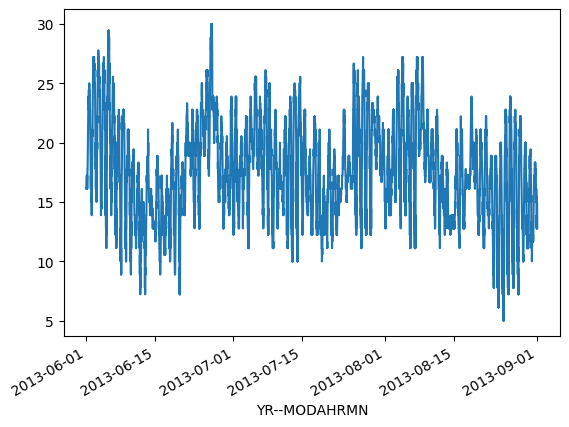

In [16]:
ax3 = summer_temps.plot()

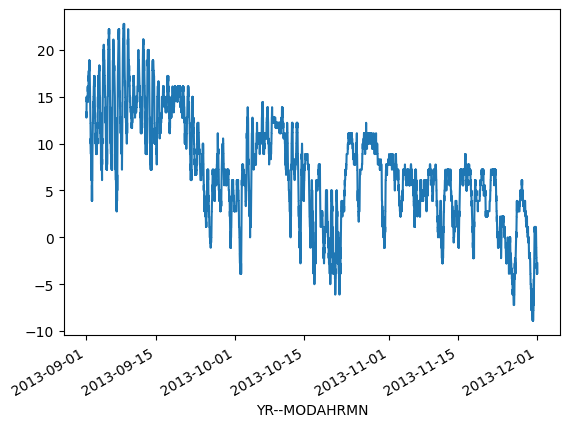

In [15]:
ax4 = autumn_temps.plot()

In [17]:
min_temp = min(
    winter_temps.min(), spring_temps.min(), summer_temps.min(), autumn_temps.min()
)
min_temp -= 5.0

max_temp = max(
    winter_temps.max(), spring_temps.max(), summer_temps.max(), autumn_temps.max()
)
max_temp += 5.0

print(f"Max: {max_temp}, Min: {min_temp}")

Max: 35.0, Min: -35.0


array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

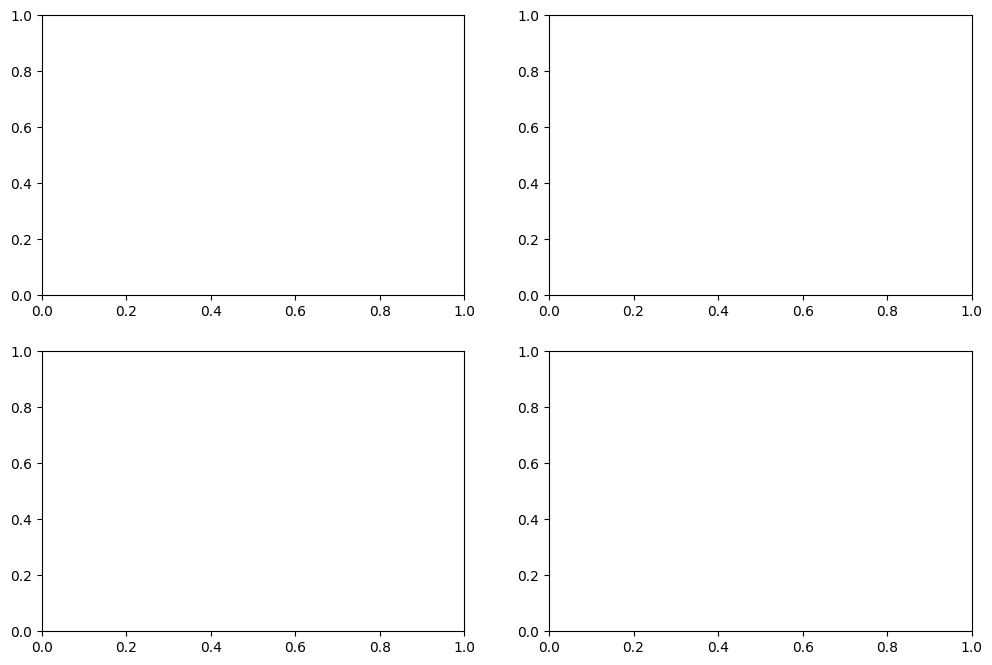

In [18]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
axes

In [19]:
ax11 = axes[0][0]
ax12 = axes[0][1]
ax21 = axes[1][0]
ax22 = axes[1][1]

In [20]:
line_width = 1.5

winter_temps.plot(ax=ax11, c="blue", lw=line_width, ylim=[min_temp, max_temp])
spring_temps.plot(ax=ax12, c="orange", lw=line_width, ylim=[min_temp, max_temp])
summer_temps.plot(ax=ax21, c="green", lw=line_width, ylim=[min_temp, max_temp])
autumn_temps.plot(ax=ax22, c="brown", lw=line_width, ylim=[min_temp, max_temp])

<Axes: xlabel='YR--MODAHRMN'>

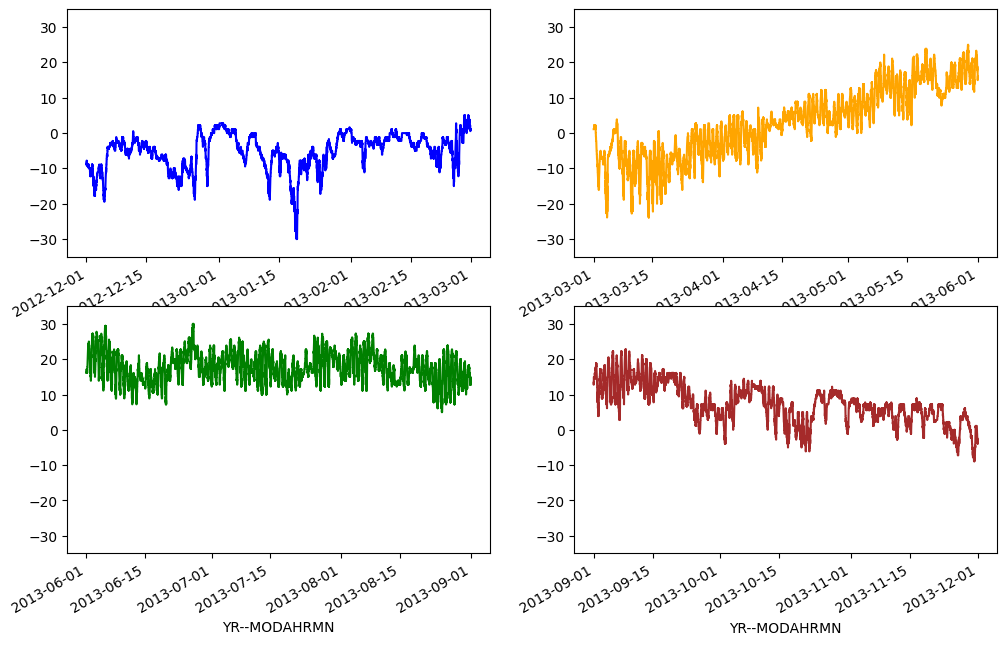

In [21]:
fig

## Advanced plot

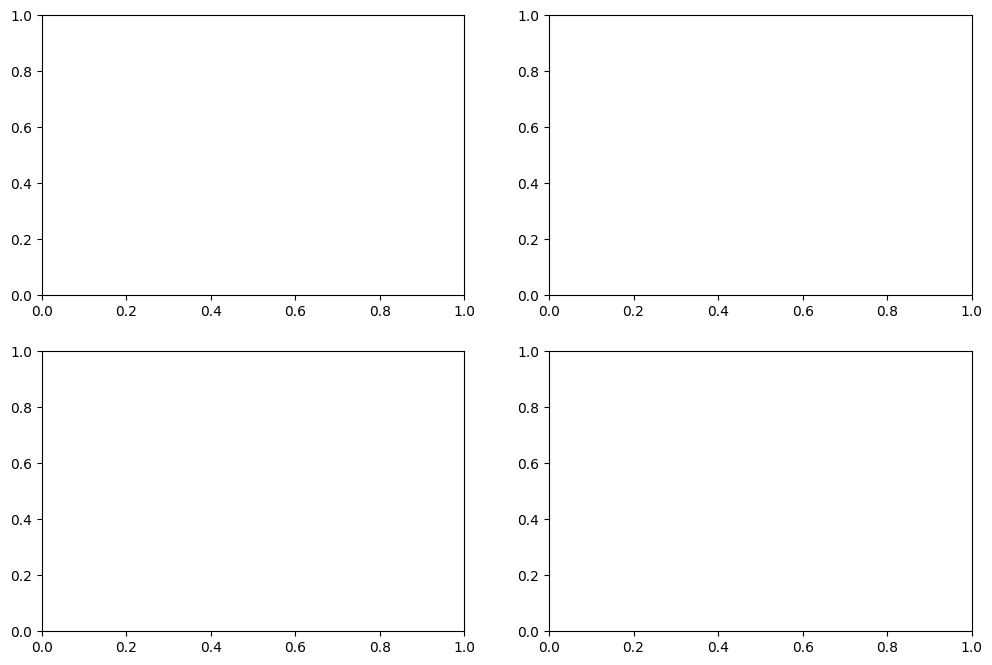

In [22]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12,8))

ax11 = axes[0][0]
ax12 = axes[0][1]
ax21 = axes[1][0]
ax22 = axes[1][1]

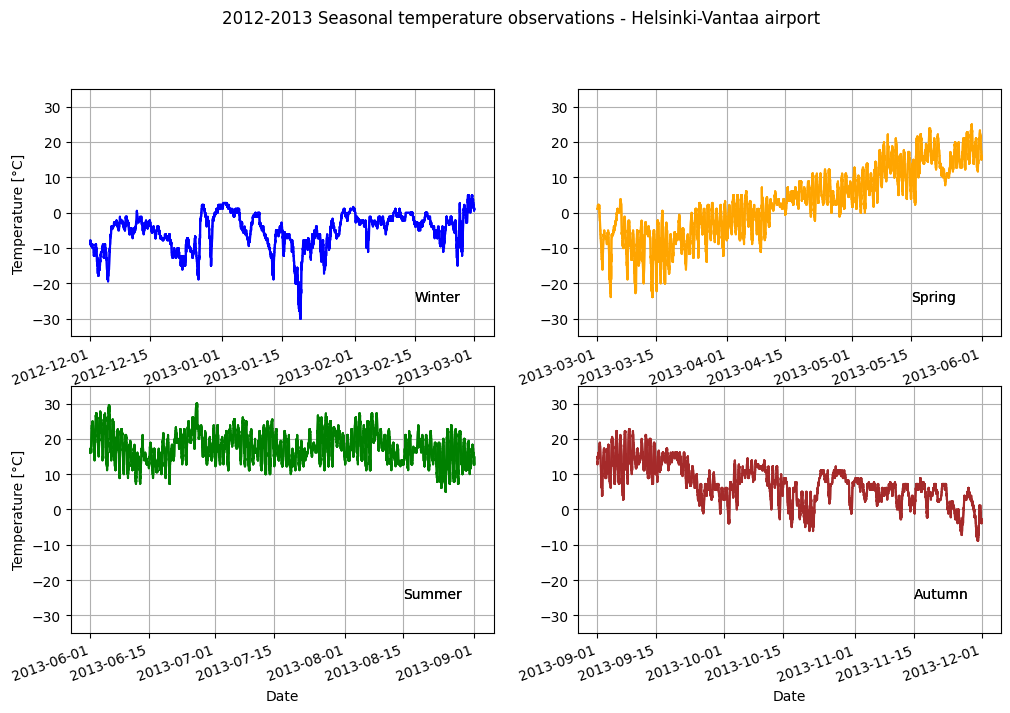

In [24]:
line_width = 1.5

# plot data
winter_temps.plot(ax=ax11, c="blue", lw=line_width, ylim=[min_temp, max_temp], grid=True)
spring_temps.plot(ax=ax12, c="orange", lw=line_width, ylim=[min_temp, max_temp], grid=True)
summer_temps.plot(ax=ax21, c="green", lw=line_width, ylim=[min_temp, max_temp], grid=True)
autumn_temps.plot(ax=ax22, c="brown", lw=line_width, ylim=[min_temp, max_temp], grid=True)

# set title
fig.suptitle("2012-2013 Seasonal temperature observations - Helsinki-Vantaa airport")

# Rotate the x-axis labels so they don't overlap
plt.setp(ax11.xaxis.get_majorticklabels(), rotation=20)
plt.setp(ax12.xaxis.get_majorticklabels(), rotation=20)
plt.setp(ax21.xaxis.get_majorticklabels(), rotation=20)
plt.setp(ax22.xaxis.get_majorticklabels(), rotation=20)

# Axis label
ax21.set_xlabel("Date")
ax22.set_xlabel("Date")
ax11.set_ylabel("Temperature [°C]")
ax21.set_ylabel("Temperature [°C]")

# Season label text
ax11.text(pd.to_datetime("20130215"), -25, "Winter")
ax12.text(pd.to_datetime("20130515"), -25, "Spring")
ax21.text(pd.to_datetime("20130815"), -25, "Summer")
ax22.text(pd.to_datetime("20131115"), -25, "Autumn")

# Display fig
fig

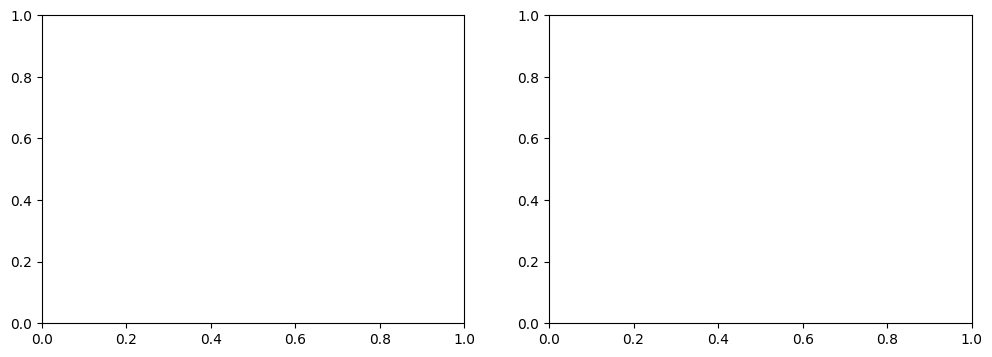

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,4))

ax1 = axes[0]
ax2 = axes[1]

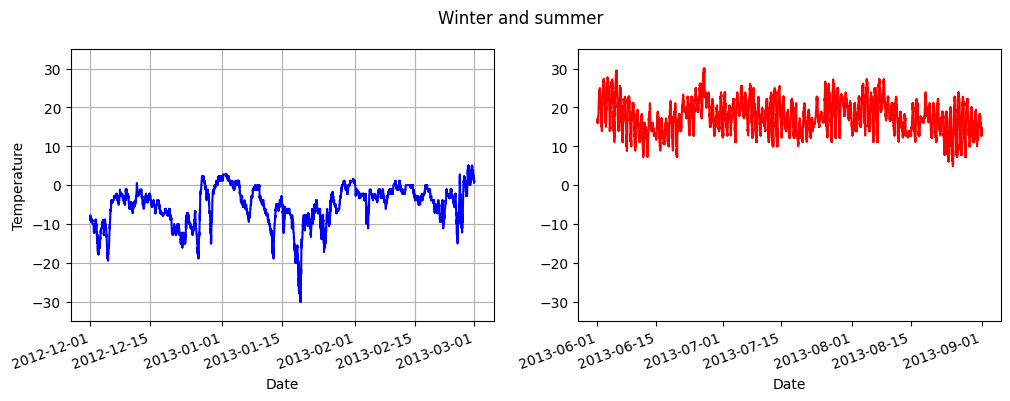

In [29]:
winter_temps.plot(ax=ax1, c="blue", lw=line_width, ylim=[min_temp, max_temp], grid=True)
summer_temps.plot(ax=ax2, c="red", lw=line_width, ylim=[min_temp, max_temp])

fig.suptitle("Winter and summer")

ax1.set_xlabel("Date")
ax2.set_xlabel("Date")
ax1.set_ylabel("Temperature")

plt.setp(ax1.xaxis.get_majorticklabels(), rotation=20)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=20)

ax11.text(pd.to_datetime("20130215"), -25, "Winter")
ax21.text(pd.to_datetime("20130815"), -25, "Summer")

fig

In [30]:
fig.savefig("test.png")